<a href="https://colab.research.google.com/github/SarahEldreny/ProBot/blob/main/Large_Purchases_by_the_State_of_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Load the Dataset

Pandas will be used to load and inspect the dataset.

In [6]:
#!pip install pymongo

In [7]:
#!pip install pymongo
# from pymongo import MongoClient
# import pandas as pd

# df = pd.read_csv('PURCHASE ORDER DATA EXTRACT 2012-2015_0.csv')

# client = MongoClient('mongodb://localhost:27017/')
# db = client['procurement_db']
# collection = db['procurement_data']

# data_dict = df.to_dict("records")
# collection.insert_many(data_dict)

In [8]:
!pip install missingno

In [9]:
import numpy as np
from scipy import stats
#from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.io
import missingno
from sklearn.impute import KNNImputer
from datetime import datetime

In [10]:
df = pd.read_csv("/content/PURCHASE ORDER DATA EXTRACT 2012-2015_0.csv")
df.head()

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
0,08/27/2013,NaN,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,NaN,WSCA/Coop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/29/2014,NaN,2013-2014,NaN,REQ0011932,REQ0011932,NON-IT Goods,NaN,Informal Competitive,NaN,...,76121504,76121504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/01/2013,NaN,2013-2014,NaN,REQ0011476,REQ0011476,IT Services,NaN,Informal Competitive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95841\n(38.662263, -121.346136)"
3,06/13/2014,06/05/2014,2013-2014,NaN,4500236642,NaN,NON-IT Goods,NaN,Informal Competitive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"91436\n(34.151642, -118.49051)"
4,03/12/2014,03/12/2014,2013-2014,1-10-75-60A,4500221028,NaN,NON-IT Goods,NaN,Statewide Contract,NaN,...,44103127,44103127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95814\n(38.580427, -121.494396)"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346018 entries, 0 to 346017
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Creation Date            346018 non-null  object 
 1   Purchase Date            328582 non-null  object 
 2   Fiscal Year              346018 non-null  object 
 3   LPA Number               92345 non-null   object 
 4   Purchase Order Number    346018 non-null  object 
 5   Requisition Number       14369 non-null   object 
 6   Acquisition Type         346018 non-null  object 
 7   Sub-Acquisition Type     68337 non-null   object 
 8   Acquisition Method       346018 non-null  object 
 9   Sub-Acquisition Method   30896 non-null   object 
 10  Department Name          346018 non-null  object 
 11  Supplier Code            345982 non-null  float64
 12  Supplier Name            345982 non-null  object 
 13  Supplier Qualifications  141745 non-null  object 
 14  Supp

In [13]:
df.describe(include="all")

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
count,346018,328582,346018,92345,346018,14369,346018,68337,346018,30896,...,345001,3.450010e+05,342723,3.427230e+05,342723,3.427230e+05,342723,3.427230e+05,342723,275908
unique,1015,2268,3,1420,200533,5997,5,25,20,16,...,46049,NaN,13220,NaN,2360,NaN,411,NaN,56,3993
top,06/27/2014,07/01/2014,2013-2014,7-11-51-02,4500211314,REQ0008872,NON-IT Goods,Personal Services,Informal Competitive,Fleet,...,15101506,NaN,Gasoline or Petrol,NaN,Petroleum and distillates,NaN,Office machines and their supplies and accesso...,NaN,Information Technology Broadcasting and Teleco...,"95691\n(38.575311, -121.560401)"
freq,1534,4499,120636,9267,602,123,215083,16104,82083,14148,...,12679,NaN,12776,NaN,14584,NaN,16479,NaN,32681,11095
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.932197e+07,NaN,4.927633e+07,NaN,4.927219e+07,NaN,4.913283e+07,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.246967e+07,NaN,2.246105e+07,NaN,2.246430e+07,NaN,2.246636e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.018170e+05,NaN,1.010150e+07,NaN,3.018000e+06,NaN,1.000000e+07,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.911171e+07,NaN,3.911160e+07,NaN,3.911000e+07,NaN,3.900000e+07,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.412160e+07,NaN,4.412150e+07,NaN,4.412000e+07,NaN,4.400000e+07,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.210151e+07,NaN,7.116110e+07,NaN,7.116000e+07,NaN,7.100000e+07,NaN,NaN


In [14]:
df.describe()

,Supplier Code,Quantity,Normalized UNSPSC,Class,Family,Segment
count,3.459820e+05,3.459880e+05,3.450010e+05,3.427230e+05,3.427230e+05,3.427230e+05
mean,8.434345e+05,2.316154e+03,4.932197e+07,4.927633e+07,4.927219e+07,4.913283e+07
std,2.461186e+06,1.058259e+05,2.246967e+07,2.246105e+07,2.246430e+07,2.246636e+07
min,0.000000e+00,1.000000e-04,3.018170e+05,1.010150e+07,3.018000e+06,1.000000e+07
25%,2.729200e+04,1.000000e+00,3.911171e+07,3.911160e+07,3.911000e+07,3.900000e+07
50%,1.012531e+06,1.000000e+00,4.412160e+07,4.412150e+07,4.412000e+07,4.400000e+07
75%,1.482180e+06,6.000000e+00,7.210151e+07,7.116110e+07,7.116000e+07,7.100000e+07
max,9.548318e+08,2.000000e+07,9.514190e+07,9.514190e+07,9.514000e+07,9.500000e+07


## Missing Data!

<Axes: >

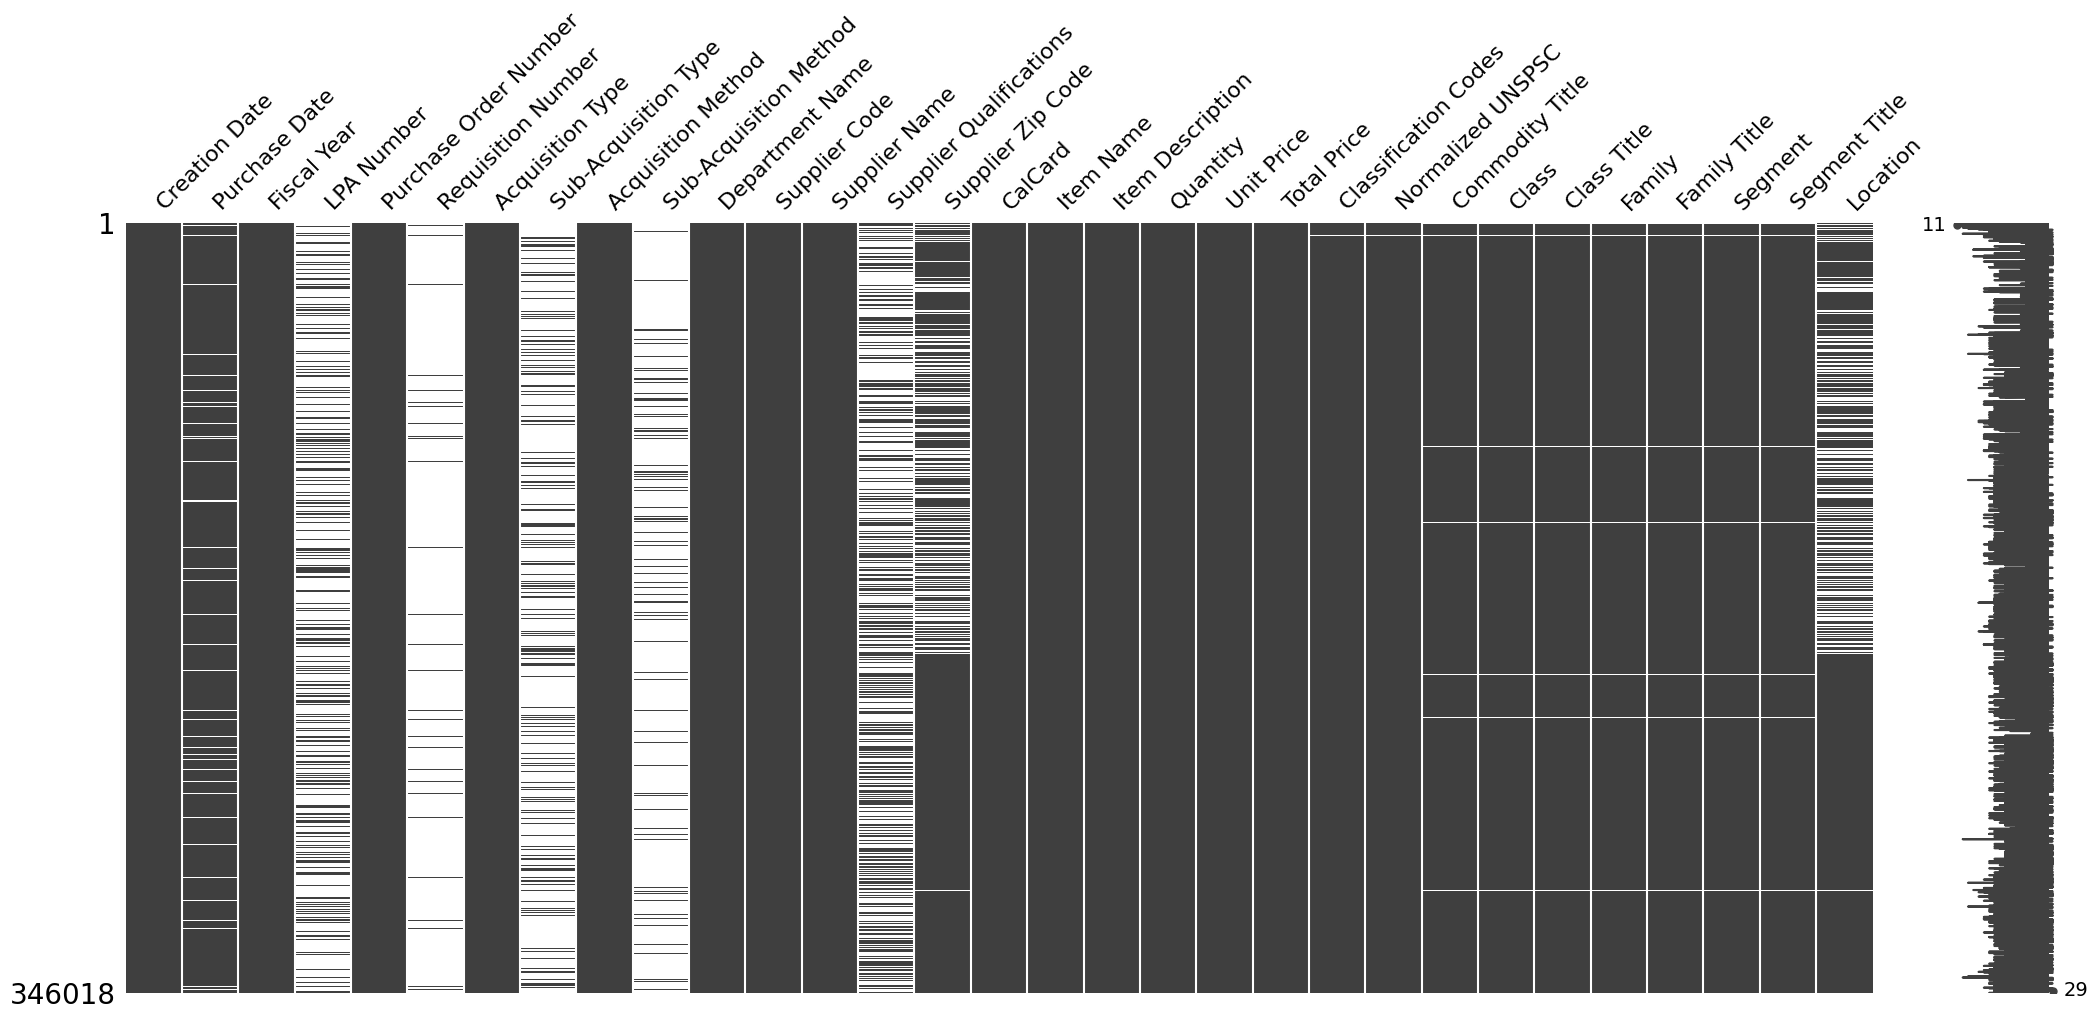

In [15]:
missingno.matrix(df)

In [16]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
18,Quantity,30
19,Unit Price,30
20,Total Price,30
16,Item Name,32
11,Supplier Code,36
12,Supplier Name,36
17,Item Description,202
21,Classification Codes,1017
22,Normalized UNSPSC,1017
28,Segment,3295


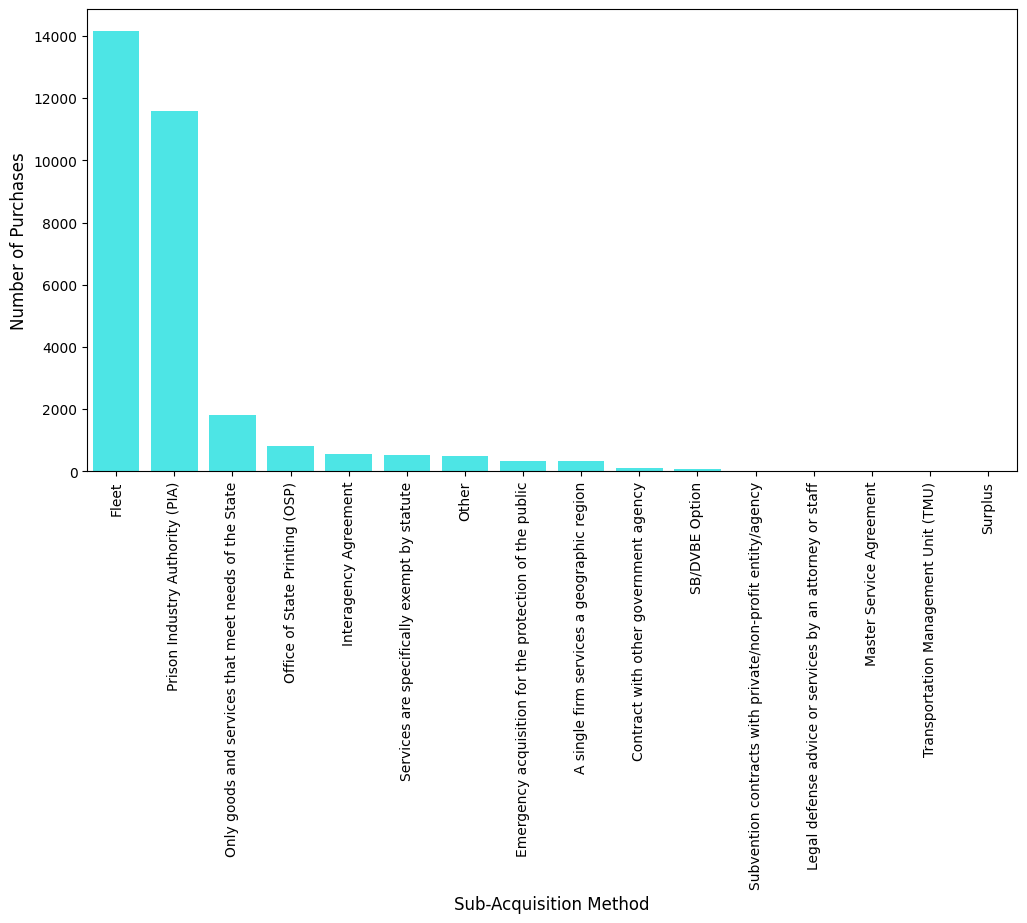

In [17]:
cnt_srs = df['Sub-Acquisition Method'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x= cnt_srs.index, y= cnt_srs.values, alpha=0.8, color='cyan')
plt.xticks(rotation='vertical')
plt.xlabel('Sub-Acquisition Method', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

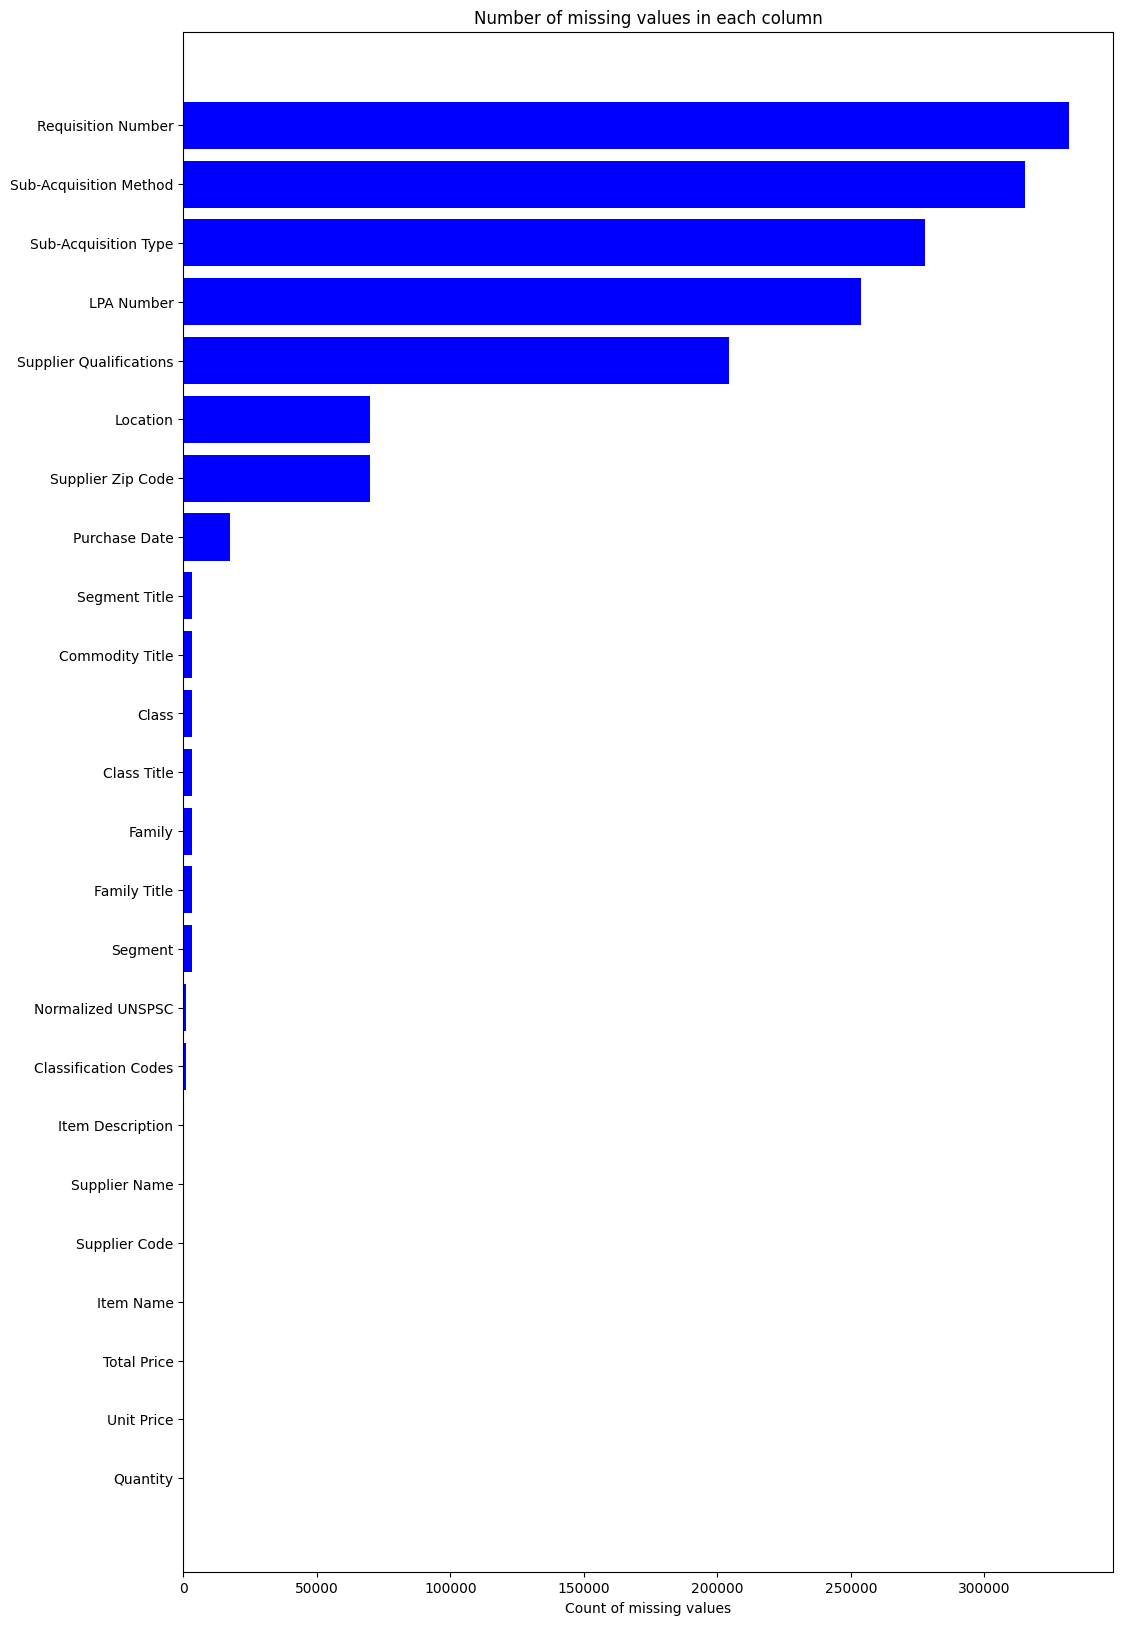

In [18]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,20))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [19]:
col_with_na = df.columns[df.isnull().any()]
list(col_with_na)


['Purchase Date',
 'LPA Number',
 'Requisition Number',
 'Sub-Acquisition Type',
 'Sub-Acquisition Method',
 'Supplier Code',
 'Supplier Name',
 'Supplier Qualifications',
 'Supplier Zip Code',
 'Item Name',
 'Item Description',
 'Quantity',
 'Unit Price',
 'Total Price',
 'Classification Codes',
 'Normalized UNSPSC',
 'Commodity Title',
 'Class',
 'Class Title',
 'Family',
 'Family Title',
 'Segment',
 'Segment Title',
 'Location']

In [20]:
col_with_na = df.loc[:,['Purchase Date','LPA Number','Requisition Number','Sub-Acquisition Type','Sub-Acquisition Method'
                        ,'Supplier Code','Supplier Name','Supplier Qualifications','Supplier Zip Code','Item Name',
                        'Item Description','Quantity','Unit Price','Total Price','Classification Codes','Normalized UNSPSC',
                        'Commodity Title','Class','Class Title','Family','Family Title','Segment','Segment Title','Location']]
col_with_na.isnull().sum()

,0
Purchase Date,17436
LPA Number,253673
Requisition Number,331649
Sub-Acquisition Type,277681
Sub-Acquisition Method,315122
Supplier Code,36
Supplier Name,36
Supplier Qualifications,204273
Supplier Zip Code,70110
Item Name,32


In [21]:
df.drop(columns= ['LPA Number','Requisition Number','Sub-Acquisition Type',
                'Sub-Acquisition Method','Supplier Qualifications', 'Supplier Zip Code', 'Location'], inplace = True)
df.isnull().sum()

,0
Creation Date,0
Purchase Date,17436
Fiscal Year,0
Purchase Order Number,0
Acquisition Type,0
Acquisition Method,0
Department Name,0
Supplier Code,36
Supplier Name,36
CalCard,0


In [22]:
df.dropna(subset=['Supplier Name'], inplace=True)

In [23]:
df = df.loc[:,"Creation Date":"Total Price"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345982 entries, 0 to 346017
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Creation Date          345982 non-null  object 
 1   Purchase Date          328546 non-null  object 
 2   Fiscal Year            345982 non-null  object 
 3   Purchase Order Number  345982 non-null  object 
 4   Acquisition Type       345982 non-null  object 
 5   Acquisition Method     345982 non-null  object 
 6   Department Name        345982 non-null  object 
 7   Supplier Code          345982 non-null  float64
 8   Supplier Name          345982 non-null  object 
 9   CalCard                345982 non-null  object 
 10  Item Name              345950 non-null  object 
 11  Item Description       345780 non-null  object 
 12  Quantity               345952 non-null  float64
 13  Unit Price             345952 non-null  object 
 14  Total Price            345952 non-null  o

In [24]:
# there are some erroneous values in the year like 2510 and 1014, so we'll clean that up
df.dropna(subset=['Purchase Date'],inplace=True)
df['Purchase Date'] = pd.to_datetime([date[:-4]+'20'+date[-2:] for date in df['Purchase Date'].dropna().values])

# Extract Year, Month, and Quarter from Purchase Date
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Quarter'] = df['Purchase Date'].dt.quarter
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328546 entries, 3 to 346017
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Creation Date          328546 non-null  object        
 1   Purchase Date          328546 non-null  datetime64[ns]
 2   Fiscal Year            328546 non-null  object        
 3   Purchase Order Number  328546 non-null  object        
 4   Acquisition Type       328546 non-null  object        
 5   Acquisition Method     328546 non-null  object        
 6   Department Name        328546 non-null  object        
 7   Supplier Code          328546 non-null  float64       
 8   Supplier Name          328546 non-null  object        
 9   CalCard                328546 non-null  object        
 10  Item Name              328514 non-null  object        
 11  Item Description       328344 non-null  object        
 12  Quantity               328516 non-null  float64  

In [25]:
df.head()

,Creation Date,Purchase Date,Fiscal Year,Purchase Order Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,Supplier Name,CalCard,Item Name,Item Description,Quantity,Unit Price,Total Price,Year,Month,Quarter
3,06/13/2014,2014-06-05,2013-2014,4500236642,NON-IT Goods,Informal Competitive,Correctional Health Care Services,1754462.0,ASHAN INC,NO,NaN,NaN,NaN,NaN,NaN,2014,6,2
4,03/12/2014,2014-03-12,2013-2014,4500221028,NON-IT Goods,Statewide Contract,"Corrections and Rehabilitation, Department of",1087660.0,Technology Integration Group,NO,Toner,Toner,1.0,$6080.26,$6080.26,2014,3,1
5,10/09/2014,2014-10-01,2014-2015,4500253427,NON-IT Goods,Informal Competitive,Correctional Health Care Services,1738777.0,WALGREENS SPECIALTY PHARMACY LLC,NO,NaN,NaN,NaN,NaN,NaN,2014,10,4
7,04/24/2014,2014-04-14,2013-2014,12-64006.01,NON-IT Services,Services are specifically exempt by statute,"State Hospitals, Department of",1069280.0,David Gallardo,NO,Radiation Oncology,Radiation Oncology,1.0,$400000.00,$400000.00,2014,4,2
9,08/14/2013,2013-07-26,2013-2014,4500200308,NON-IT Goods,Informal Competitive,"Water Resources, Department of",1014234.0,CLARKE SALES,NO,"1"" ss 90* elbow , threaded","1"" ss 90* elbow , threaded",4.0,$21.65,$86.60,2013,7,3


In [26]:
#numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
#knn_imputer = KNNImputer(n_neighbors=5)
#df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])
print(df.isnull().sum())

Creation Date              0
Purchase Date              0
Fiscal Year                0
Purchase Order Number      0
Acquisition Type           0
Acquisition Method         0
Department Name            0
Supplier Code              0
Supplier Name              0
CalCard                    0
Item Name                 32
Item Description         202
Quantity                  30
Unit Price                30
Total Price               30
Year                       0
Month                      0
Quarter                    0
dtype: int64


In [27]:
# Remove '$' and ',' from 'Unit Price' and 'Total Price' columns
df['Unit Price'] = df['Unit Price'].str.replace('[\$,]', '', regex=True).astype(float)
df['Total Price'] = df['Total Price'].str.replace('[\$,]', '', regex=True).astype(float)

In [28]:
# Impute missing values for numerical columns
imputer = KNNImputer(n_neighbors=5)
numerical_cols = ['Unit Price', 'Total Price','Quantity']
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [29]:
purchase_prices = df['Total Price']
print('Minimum Purchase Price = ' + str(min(purchase_prices)))
print('Maximum Purchase Price = ' + str(max(purchase_prices)))
print('Average Purchase Price = ' + str(np.mean(purchase_prices)))

Minimum Purchase Price = -30861228.0
Maximum Purchase Price = 7337038064.0
Average Purchase Price = 457835.30999178125


### Handling Duplicates

In [30]:
#find the number of duplicates
df.duplicated().sum()

2144

In [31]:
# Show the duplicated rows
df[df.duplicated(keep = 'last')]

,Creation Date,Purchase Date,Fiscal Year,Purchase Order Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,Supplier Name,CalCard,Item Name,Item Description,Quantity,Unit Price,Total Price,Year,Month,Quarter
62,05/28/2013,2013-05-22,2012-2013,4500182023,NON-IT Goods,Informal Competitive,"Corrections and Rehabilitation, Department of",32474.0,GEORGES AUTO DIESEL ELECTRIC,NO,socket rails,socket rails,4.0,2.50,10.00,2013,5,2
183,05/16/2014,2014-05-15,2013-2014,4500210896,NON-IT Goods,SB/DVBE Option,"Water Resources, Department of",1755530.0,TDM Supply,NO,"BOARD,LIMITORQUE,R:I, 4-20ma,#21800-530","BOARD,LIMITORQUE,R:I, 4-20ma,#21800-530",2.0,1912.00,3824.00,2014,5,2
225,08/14/2014,2014-08-12,2014-2015,14-G0063,NON-IT Goods,Informal Competitive,"Pesticide Regulation, Department of",10803.0,River City Office Supply,NO,Markers,markers,1.0,10.80,10.80,2014,8,3
676,04/16/2015,2015-04-16,2014-2015,4500277988,NON-IT Goods,Fair and Reasonable,"Corrections and Rehabilitation, Department of",16068.0,Western Plumbing Parts & Specialties,NO,stem fisher,stem fisher,10.0,25.57,255.70,2015,4,2
877,07/23/2012,2012-07-20,2012-2013,12482010,NON-IT Goods,SB/DVBE Option,"Mental Health, Department of",12341.0,"TAGG Industries, Inc.",NO,anti embolism stocking,12 pair / case,1.0,33.12,33.12,2012,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337206,04/08/2015,2015-04-01,2014-2015,4500221608,NON-IT Goods,Informal Competitive,"Water Resources, Department of",35423.0,Cal Best Industrial Supply,NO,"PANTS,ARC/FLASH","PANTS,ARC/FLASH",3.0,72.00,216.00,2015,4,2
339372,02/10/2014,2014-02-06,2013-2014,13-G0283,NON-IT Goods,Informal Competitive,"Pesticide Regulation, Department of",49734.0,Spectrum Office Products,NO,Highlighters,highlighters,2.0,8.29,16.58,2014,2,1
339491,03/24/2014,2014-03-19,2013-2014,4500208705,NON-IT Goods,Informal Competitive,"Water Resources, Department of",1000633.0,"Hunt & Sons, Inc",NO,"OIL,TURBINE,ISO 32","OIL,TURBINE,ISO 32",550.0,11.44,6292.00,2014,3,1
342554,06/14/2014,2014-06-13,2013-2014,4500212116,NON-IT Goods,Informal Competitive,"Water Resources, Department of",47274.0,"MB Contract Furniture, Inc.",NO,table top 30x60 postform edge,table top 30x60 postform edge,2.0,352.80,705.60,2014,6,2


In [32]:
# double check the duplicated rows
df[df.duplicated(keep = 'first')]

,Creation Date,Purchase Date,Fiscal Year,Purchase Order Number,Acquisition Type,Acquisition Method,Department Name,Supplier Code,Supplier Name,CalCard,Item Name,Item Description,Quantity,Unit Price,Total Price,Year,Month,Quarter
1952,05/16/2014,2014-05-15,2013-2014,4500210896,NON-IT Goods,SB/DVBE Option,"Water Resources, Department of",1755530.0,TDM Supply,NO,"BOARD,LIMITORQUE,R:I, 4-20ma,#21800-530","BOARD,LIMITORQUE,R:I, 4-20ma,#21800-530",2.0,1912.00,3824.00,2014,5,2
2261,08/14/2014,2014-08-12,2014-2015,14-G0063,NON-IT Goods,Informal Competitive,"Pesticide Regulation, Department of",10803.0,River City Office Supply,NO,Markers,markers,1.0,10.80,10.80,2014,8,3
5053,06/24/2013,2013-06-05,2012-2013,12-G0490,NON-IT Goods,Fair and Reasonable,"Pesticide Regulation, Department of",1036978.0,Screaming Squeegee,NO,Shirt,shirt,3.0,21.95,65.85,2013,6,2
5572,06/23/2013,2013-06-22,2012-2013,4500199404,IT Goods,Statewide Contract,"Water Resources, Department of",13274.0,Western Blue Corporation,NO,"655624-B21,HP SL230 Large Form Factor","655624-B21,HP SL230 Large Form Factor",8.0,54.78,438.24,2013,6,2
5653,06/27/2013,2013-06-03,2012-2013,CF121028,IT Goods,Informal Competitive,"Forestry and Fire Protection, Department of",1750158.0,ENVIRONMENTAL SYSTEMS RESEARCH,NO,ArcGIS for Desktop Basic Single Use Annual Mai...,Maintenance,2.0,400.00,800.00,2013,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345735,03/24/2014,2014-03-19,2013-2014,4500208707,NON-IT Goods,SB/DVBE Option,"Water Resources, Department of",10912.0,ELECTRIC PARTS CENTER,NO,"SWITCH,FLOW,MAGNETROL #XF50-1A2F-CNP","SWITCH,FLOW,MAGNETROL #XF50-1A2F-CNP",3.0,1499.00,4497.00,2014,3,1
345761,05/01/2013,2013-02-20,2012-2013,1PA2A135,NON-IT Goods,Fair and Reasonable,"Forestry and Fire Protection, Department of",1738814.0,Eaton Corporation,YES,UPS Breaker,UPS Breaker,1.0,4146.80,4146.80,2013,2,1
345769,11/15/2013,2013-11-14,2013-2014,4500204402,NON-IT Goods,WSCA/Coop,"Water Resources, Department of",1013057.0,Fastenal,NO,"HERBICIDE,MILESTONE","HERBICIDE,MILESTONE",20.0,362.70,7254.00,2013,11,4
345826,09/03/2013,2011-07-01,2013-2014,9CA00702,NON-IT Services,Services are specifically exempt by statute,"Forestry and Fire Protection, Department of",26620.0,"Thomas J. Ferguson, M.D., Ph.D.",NO,Respiratory Protection/Pre-Employment Physician,Respiratory Protection/Pre-Employment Physician,1.0,125200.00,125200.00,2011,7,3


In [33]:
#remove duplicates
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326402 entries, 3 to 346017
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Creation Date          326402 non-null  object        
 1   Purchase Date          326402 non-null  datetime64[ns]
 2   Fiscal Year            326402 non-null  object        
 3   Purchase Order Number  326402 non-null  object        
 4   Acquisition Type       326402 non-null  object        
 5   Acquisition Method     326402 non-null  object        
 6   Department Name        326402 non-null  object        
 7   Supplier Code          326402 non-null  float64       
 8   Supplier Name          326402 non-null  object        
 9   CalCard                326402 non-null  object        
 10  Item Name              326370 non-null  object        
 11  Item Description       326200 non-null  object        
 12  Quantity               326402 non-null  float64  

### Feature Engineering & Visualization (EDA)

In [34]:
df['Creation Date'] = pd.to_datetime(df['Creation Date'], errors='coerce')
df['Creation Day'] = df['Creation Date'].dt.day
df['Day of Week'] = df['Creation Date'].dt.day_name()
df['Is Weekend'] = df['Day of Week'].apply(lambda day: day in ['Saturday', 'Sunday'])
df['Time of Day'] = df['Creation Date'].dt.hour

cnt_srs = df['Creation Day'].value_counts()
cnt_srs.sort_index(inplace=True)
cnt_srs

,count
Creation Day,
1,7770
2,11661
3,10534
4,10966
5,10647
6,10504
7,10365
8,9387
9,10768


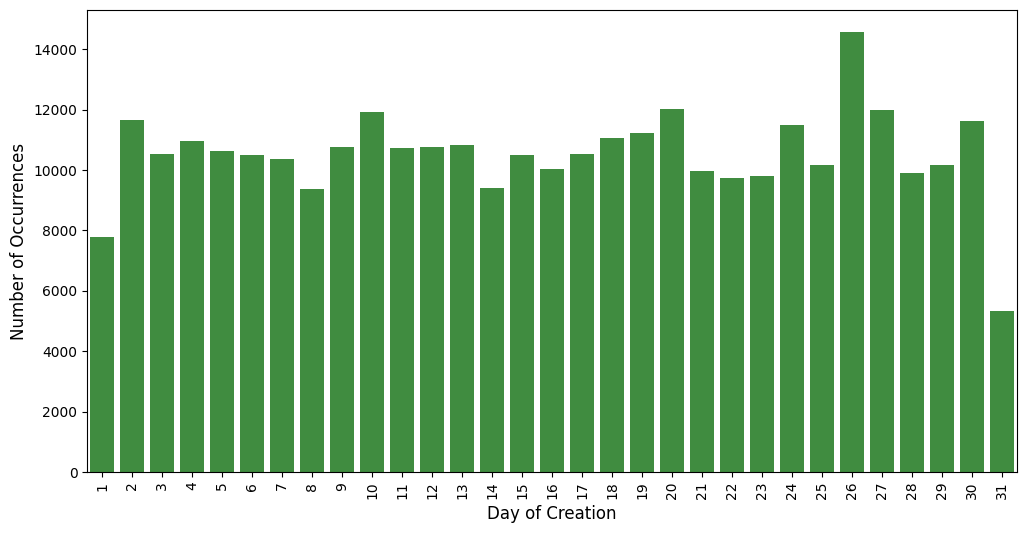

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x= cnt_srs.index, y= cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Day of Creation', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

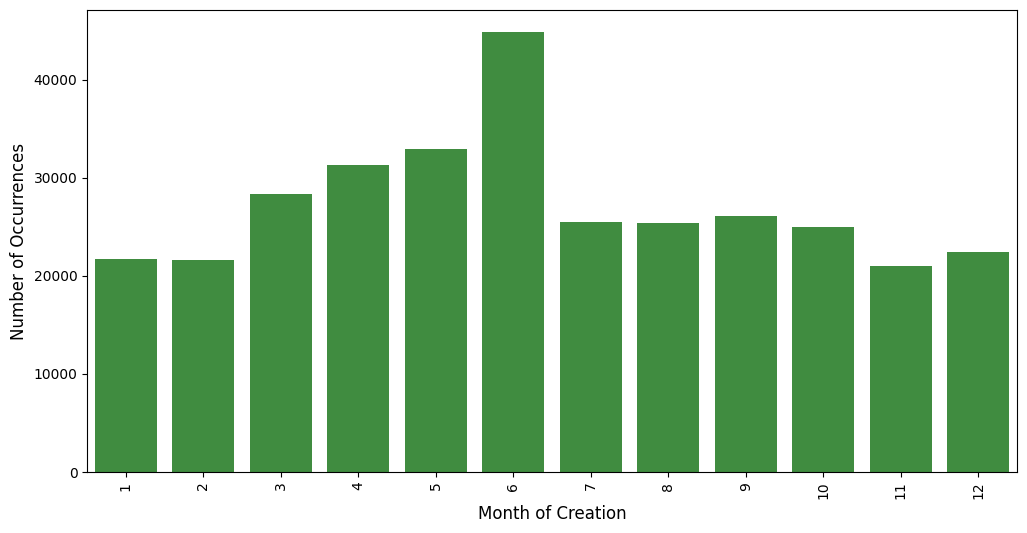

In [36]:
df['Creation Month'] = df['Creation Date'].dt.month
cnt_srs = df['Creation Month'].value_counts()
cnt_srs.sort_index(inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Month of Creation', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

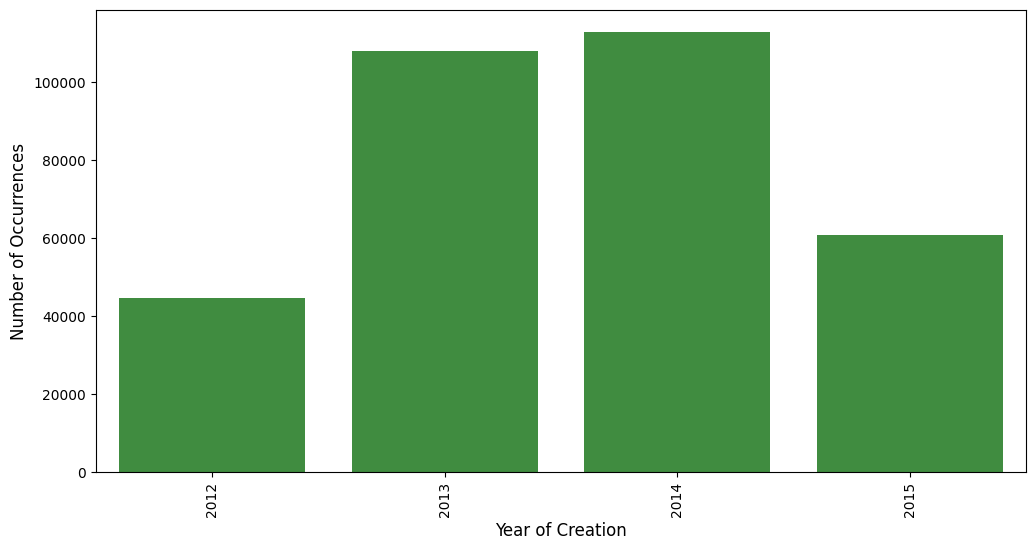

In [37]:
df['Creation Year'] = df['Creation Date'].dt.year
cnt_srs = df['Creation Year'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x= cnt_srs.index, y= cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Year of Creation', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [38]:
df['Purchase Day'] = df['Purchase Date'].dt.day
cnt_srs = df['Purchase Day'].value_counts()
cnt_srs.sort_index(inplace=True)
cnt_srs

,count
Purchase Day,
1,30947
2,7684
3,10369
4,8904
5,10223
6,9286
7,8375
8,9017
9,9589


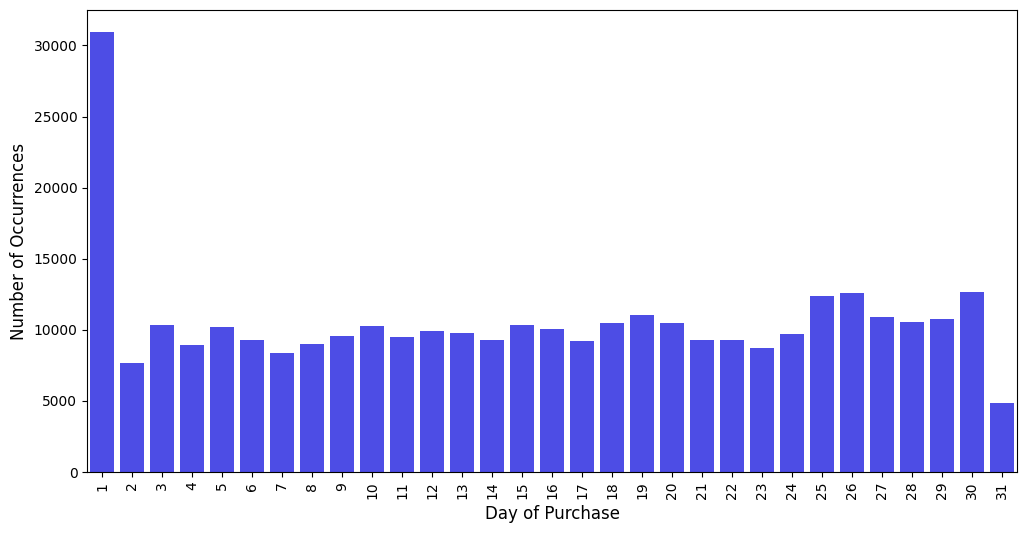

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x= cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Day of Purchase', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

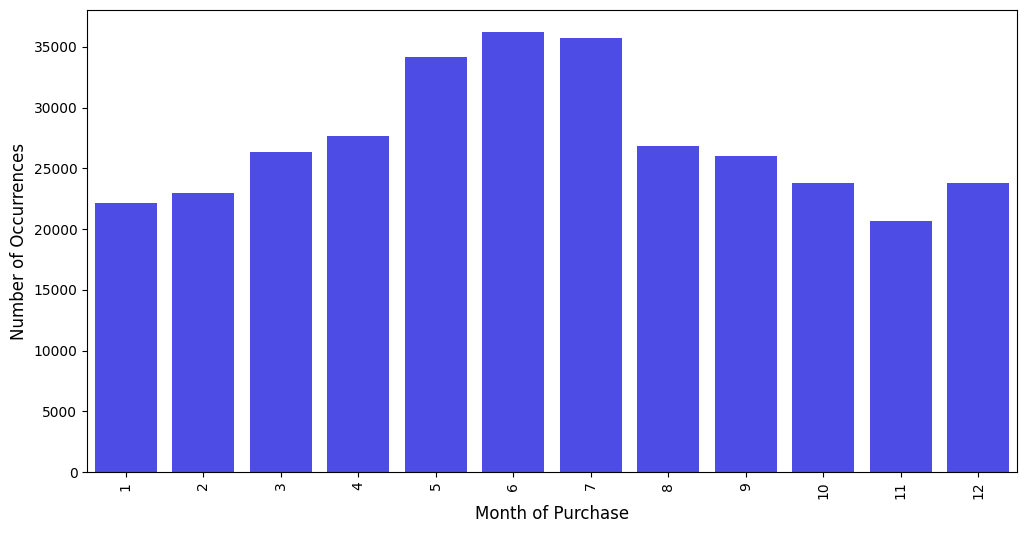

In [40]:
df['Purchase Month'] = df['Purchase Date'].dt.month
cnt_srs =df['Purchase Month'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x= cnt_srs.index, y= cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Month of Purchase', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

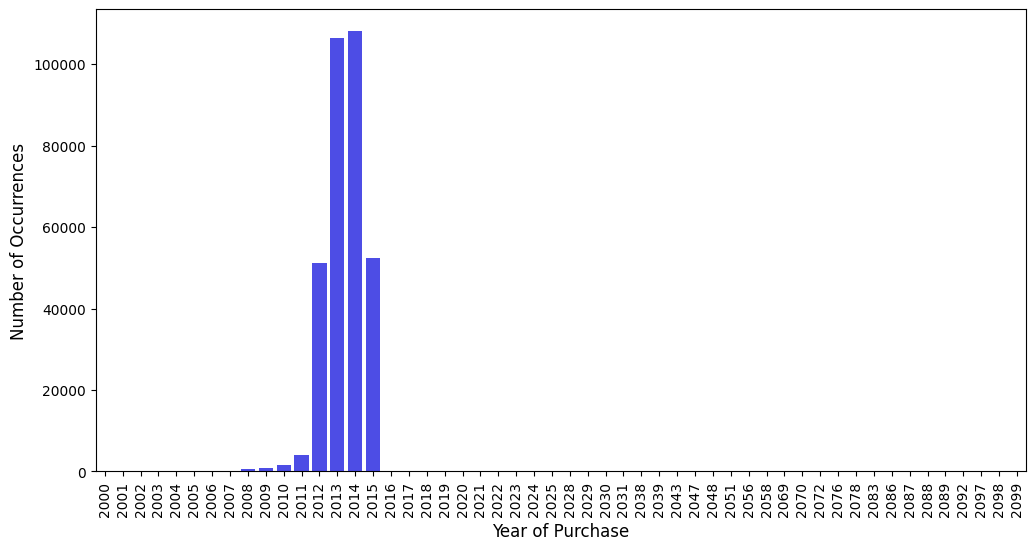

In [41]:
df['Purchase Year'] = df['Purchase Date'].dt.year
cnt_srs = df['Purchase Year'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x= cnt_srs.index, y= cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Year of Purchase', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

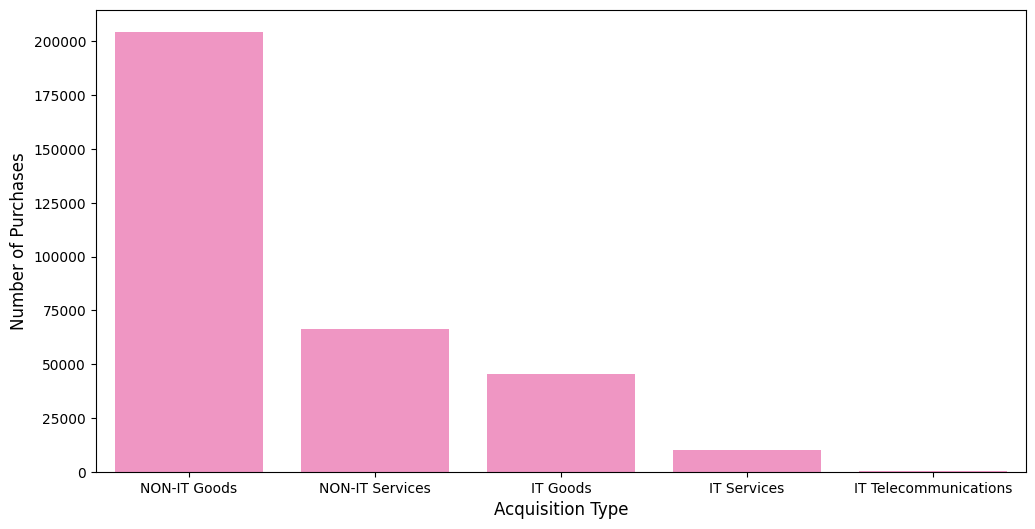

In [42]:
cnt_srs = df['Acquisition Type'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x= cnt_srs.index, y= cnt_srs.values, alpha=0.8, color='hotpink')
#plt.xticks(rotation='vertical')
plt.xlabel('Acquisition Type', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

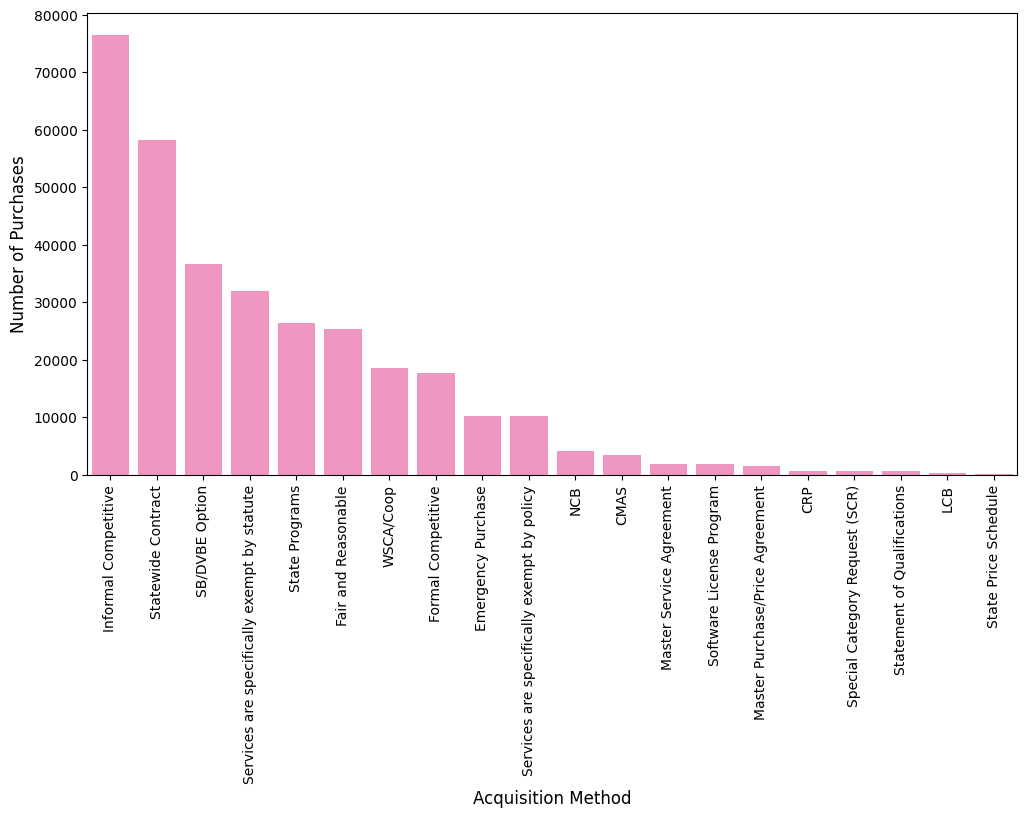

In [43]:
cnt_srs = df['Acquisition Method'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x= cnt_srs.index, y= cnt_srs.values, alpha=0.8, color='hotpink')
plt.xticks(rotation='vertical')
plt.xlabel('Acquisition Method', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

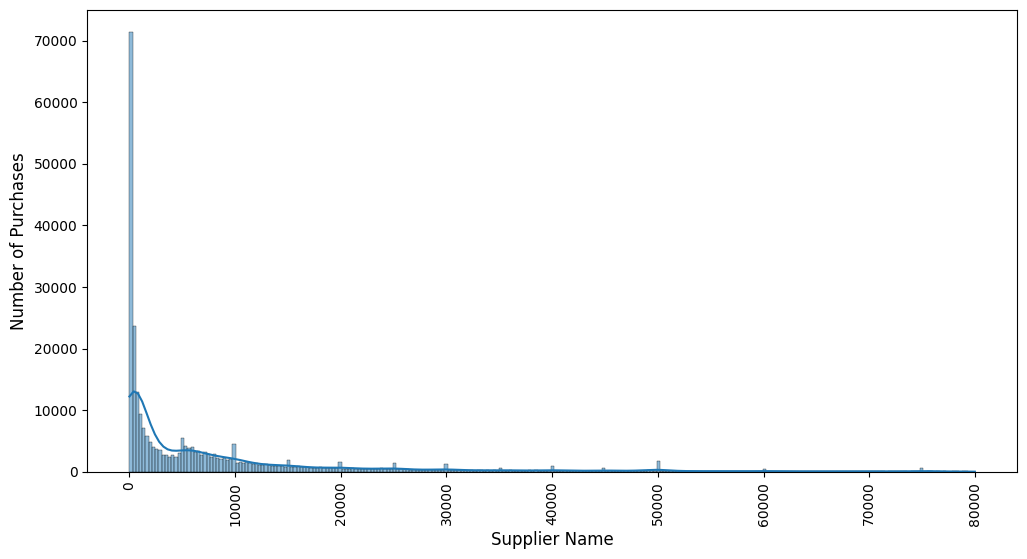

In [44]:
# let's plot without these negative and extremely large positive numbers, which don't sound correct

plt.figure(figsize=(12,6))
sns.histplot([x for x in purchase_prices if x > 0 and x < 8e4], kde=True)
plt.xticks(rotation='vertical')
plt.xlabel('Supplier Name', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

In [45]:
# Explore Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':\n", df[col].unique())  # Unique values in categorical columns
    print(f"\nFrequency of values in '{col}':\n", df[col].value_counts())  # Frequency of each unique value



Unique values in 'Fiscal Year':
 ['2013-2014' '2014-2015' '2012-2013']

Frequency of values in 'Fiscal Year':
 Fiscal Year
2013-2014    113320
2014-2015    111026
2012-2013    102056
Name: count, dtype: int64

Unique values in 'Purchase Order Number':
 ['4500236642' '4500221028' '4500253427' ... 'P1300585' '4500252536'
 '2ui3L262']

Frequency of values in 'Purchase Order Number':
 Purchase Order Number
4500211314     602
4500201426     579
4500204899     578
4500203794     578
4500202454     564
              ... 
14C076001        1
13-5670          1
13-PO-01792      1
14-10110         1
2ui3L262         1
Name: count, Length: 193952, dtype: int64

Unique values in 'Acquisition Type':
 ['NON-IT Goods' 'NON-IT Services' 'IT Goods' 'IT Services'
 'IT Telecommunications']

Frequency of values in 'Acquisition Type':
 Acquisition Type
NON-IT Goods             204492
NON-IT Services           66395
IT Goods                  45302
IT Services               10066
IT Telecommunications       

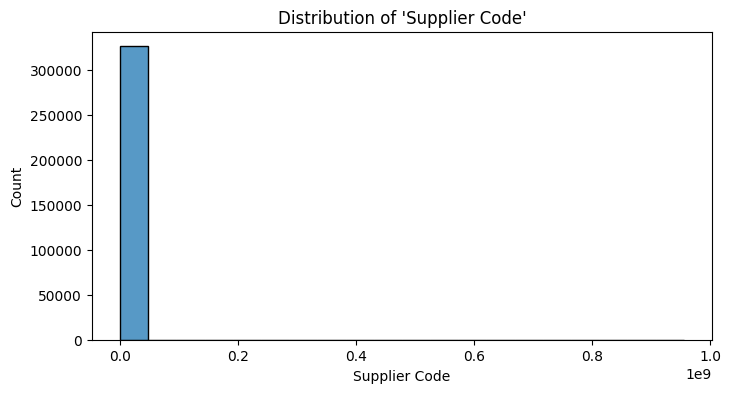

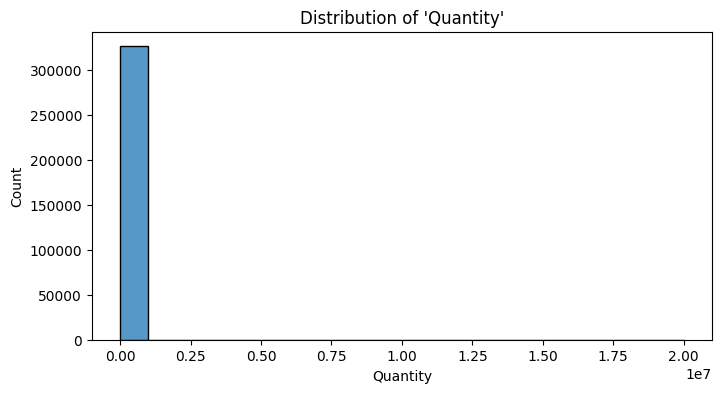

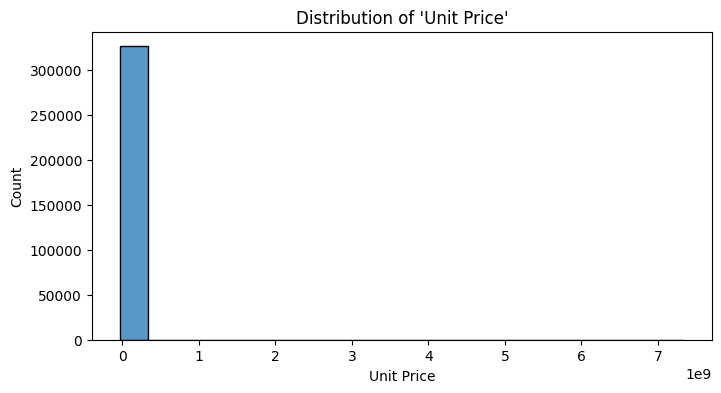

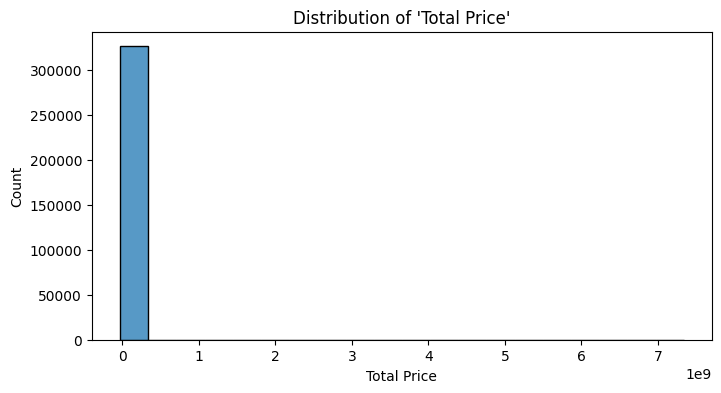

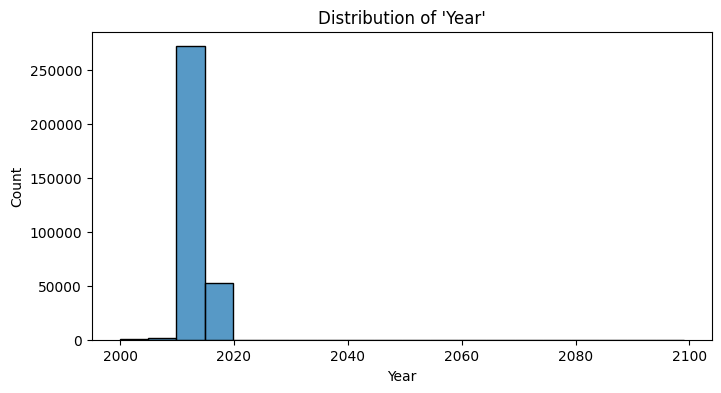

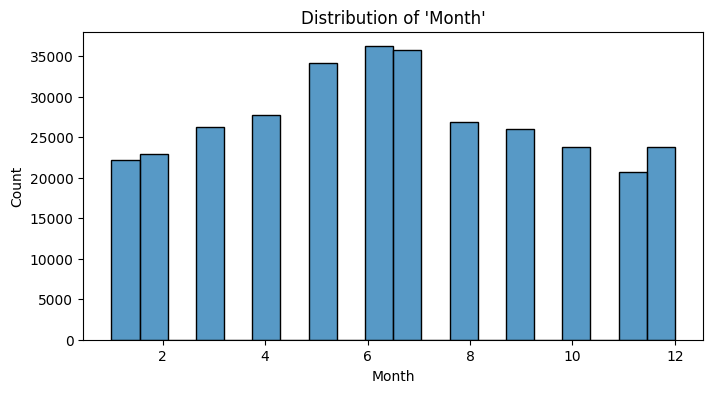

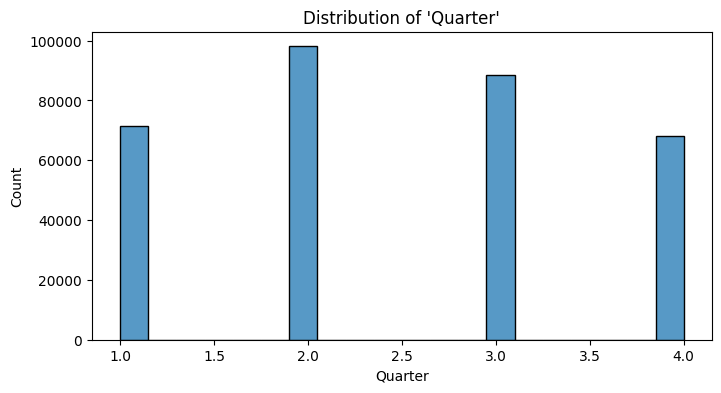

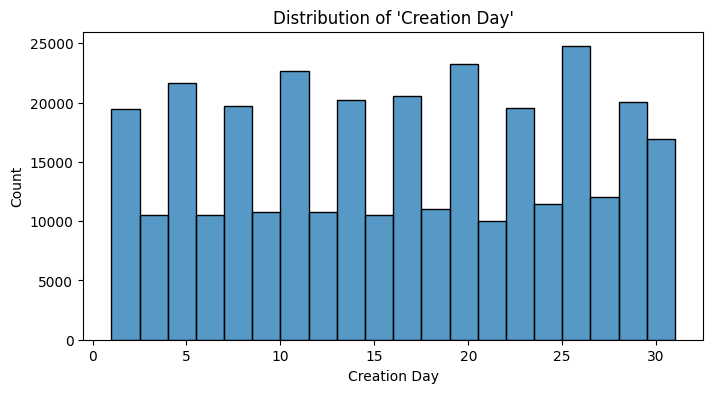

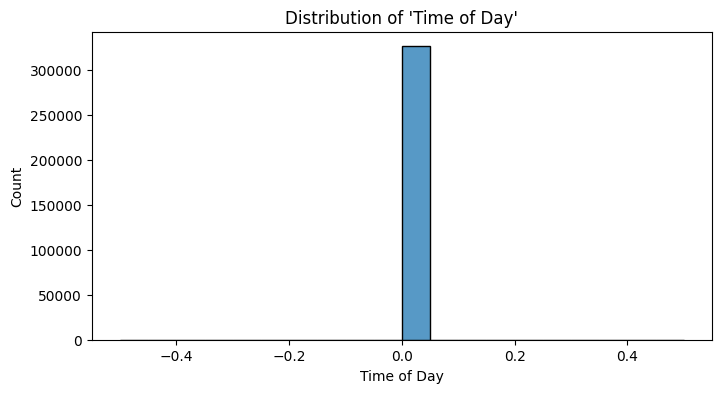

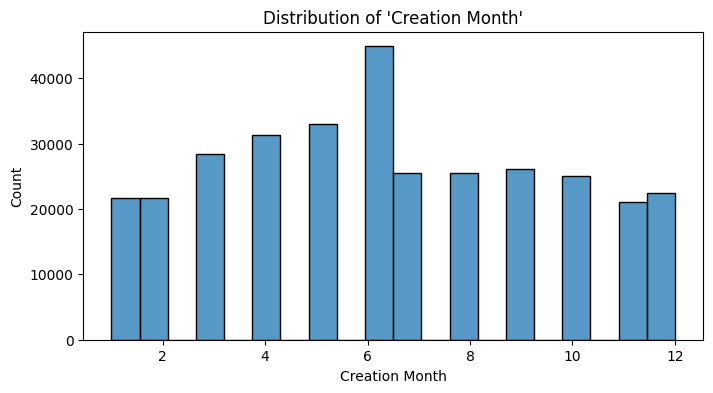

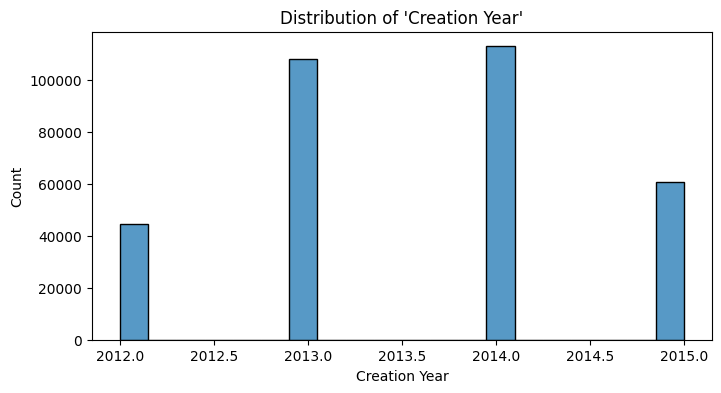

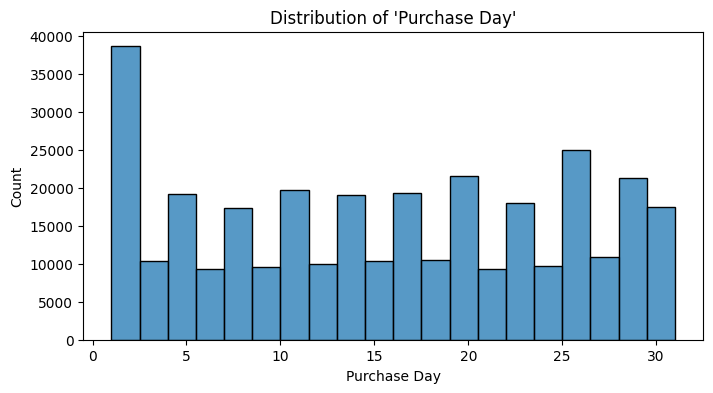

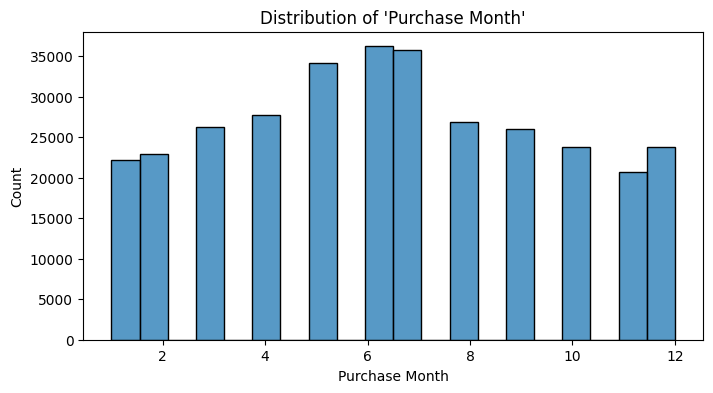

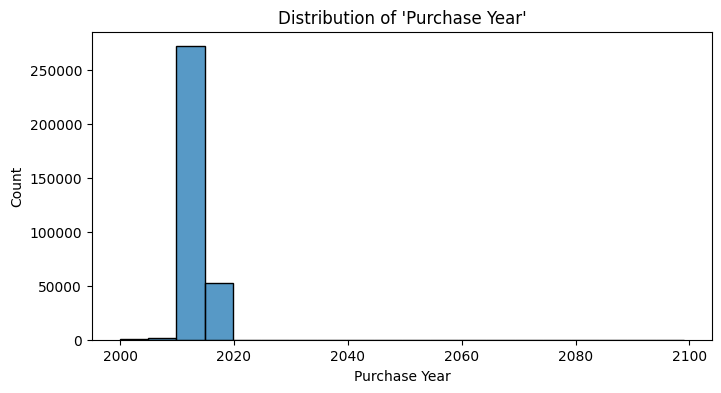

In [46]:
# Explore Numerical Features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20)  # Histograms for numerical features
    plt.title(f"Distribution of '{col}'")
    plt.show()

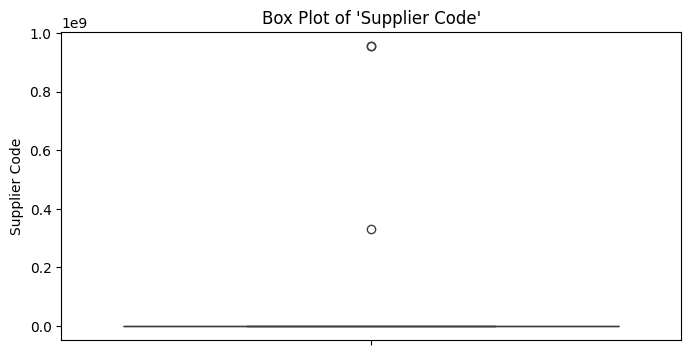

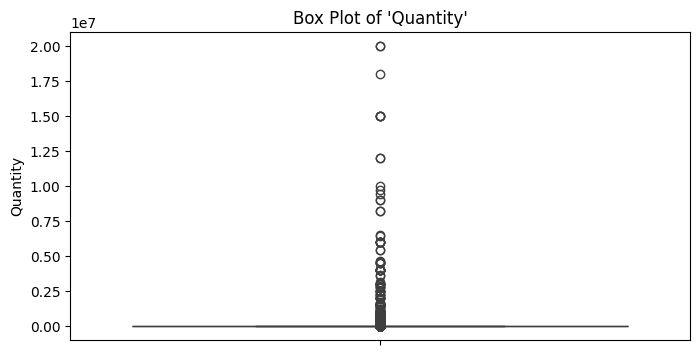

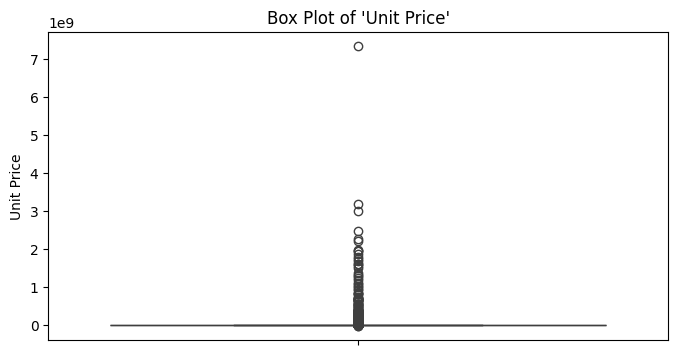

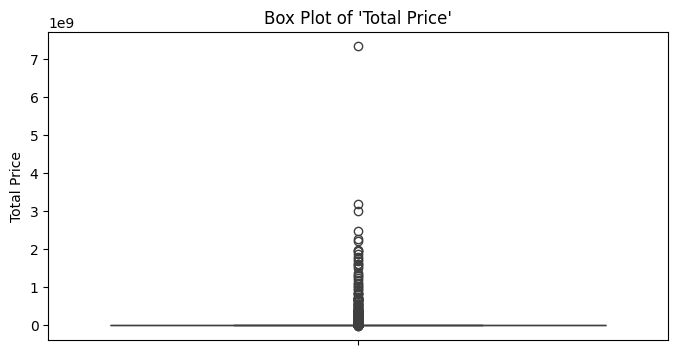

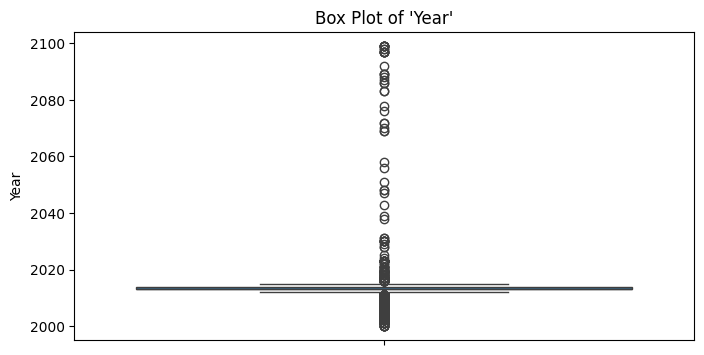

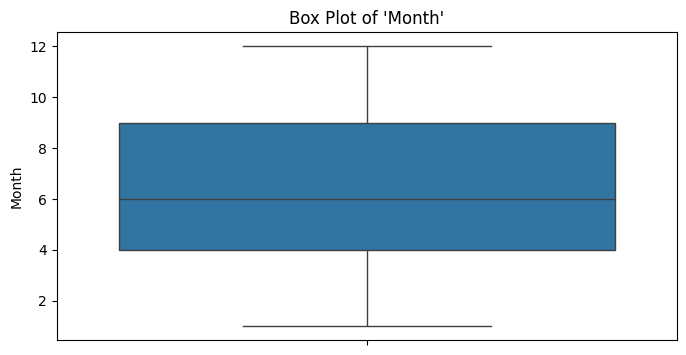

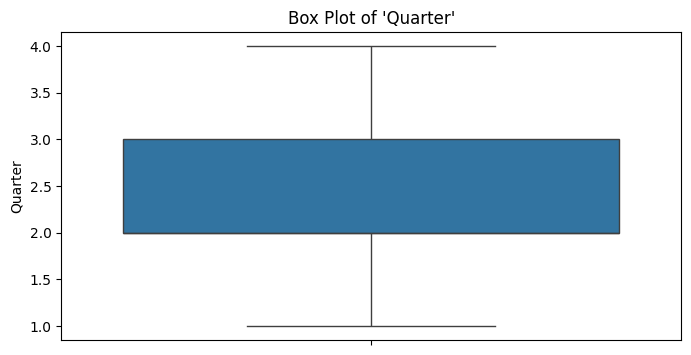

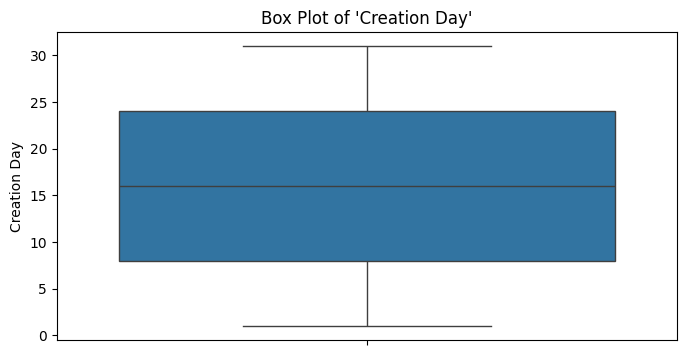

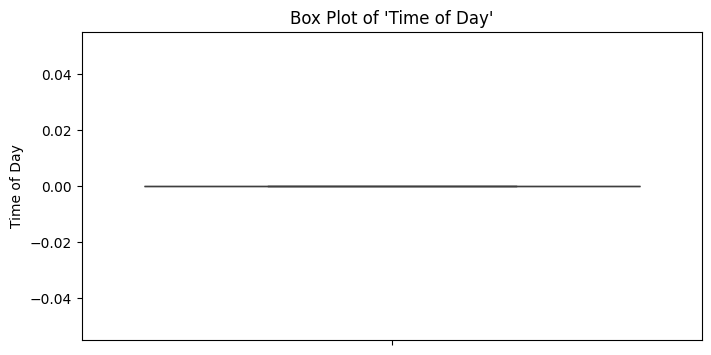

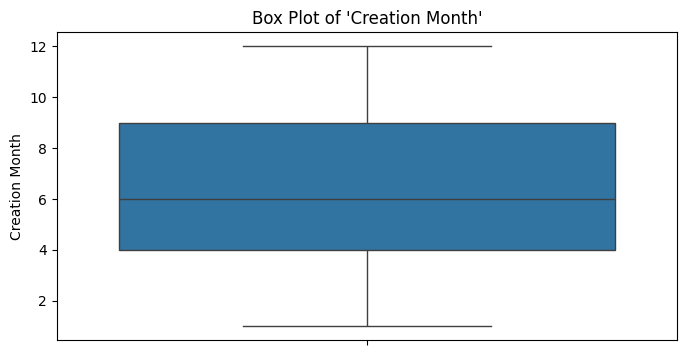

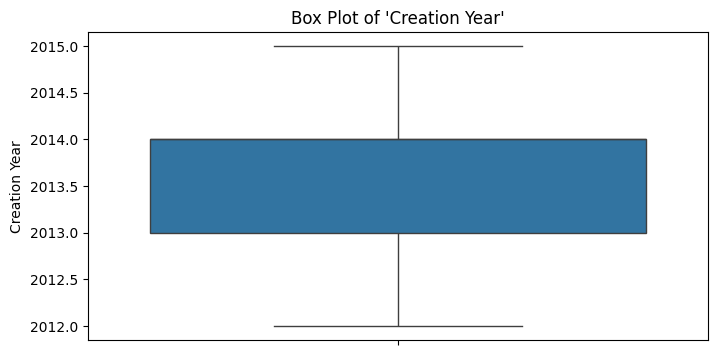

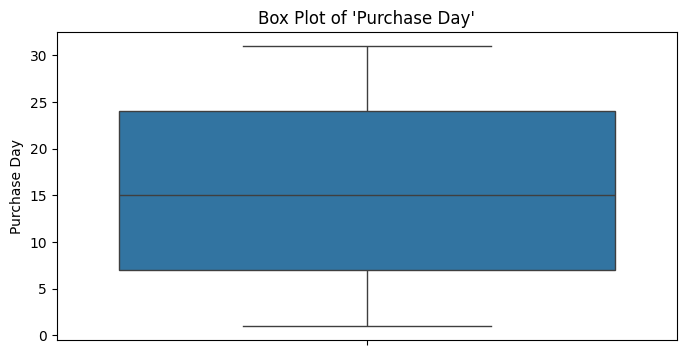

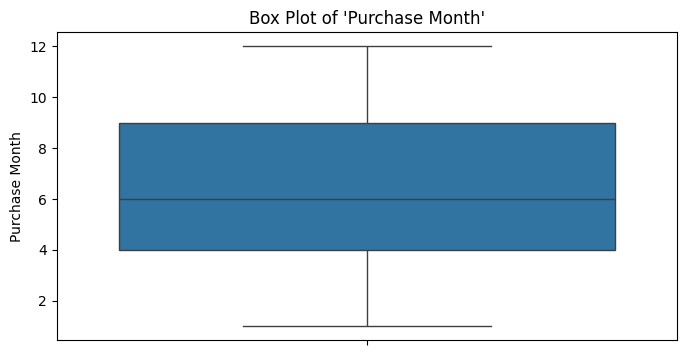

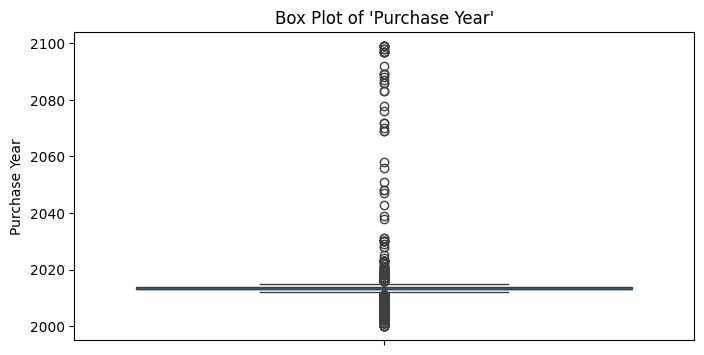

In [47]:
for col in numerical_cols:
    # Box plots for numerical features to identify outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of '{col}'")
    plt.show()

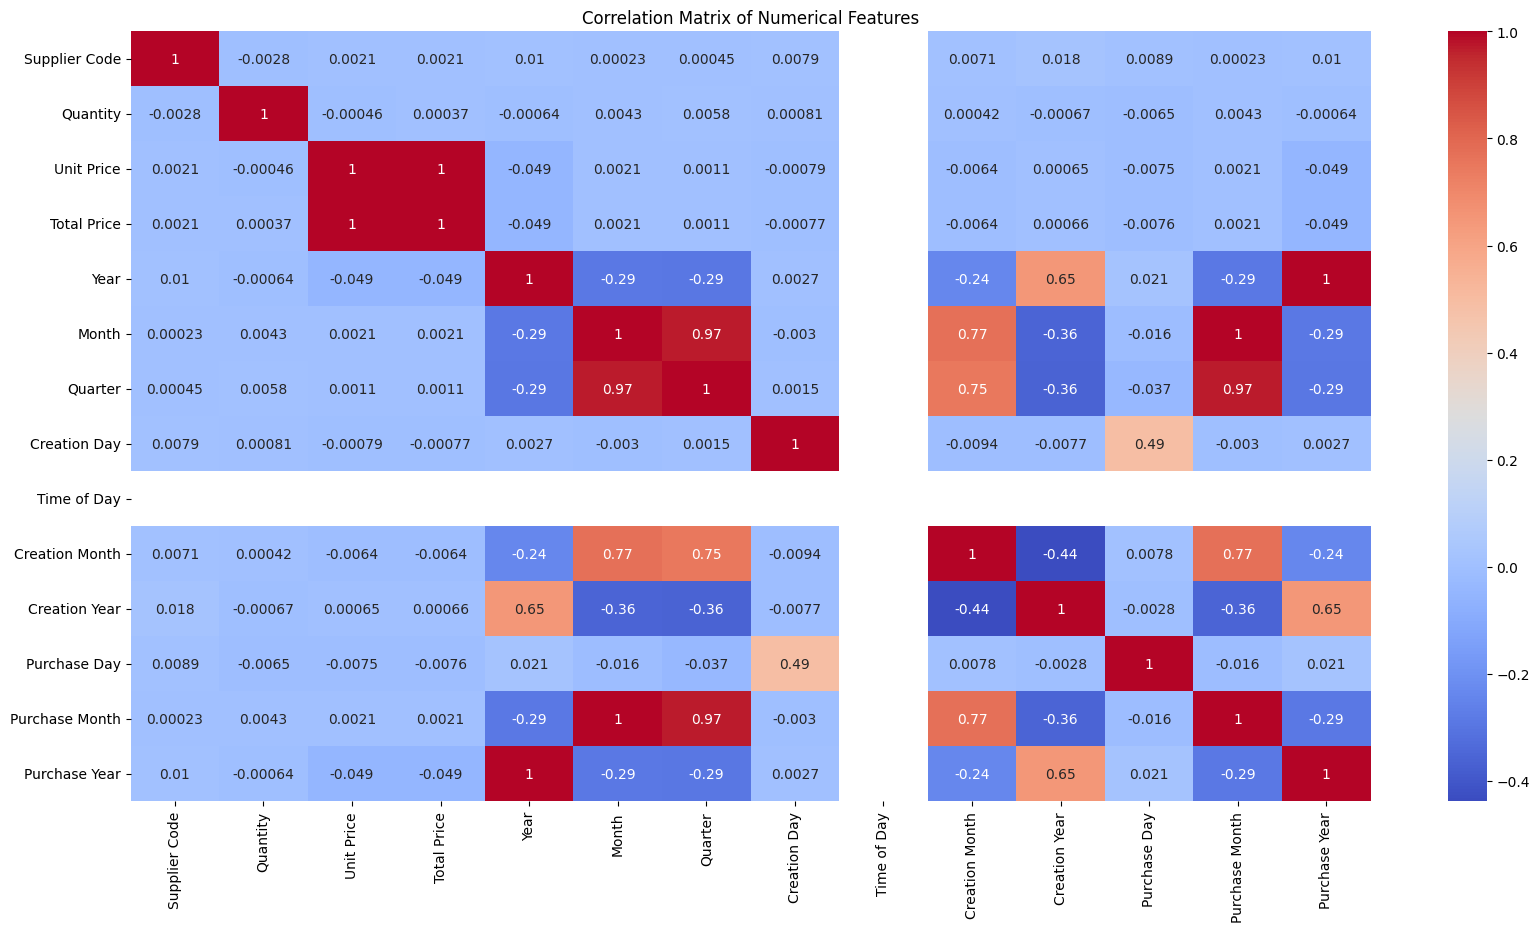

In [48]:
# Correlation Analysis (for numerical features)
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Correlation heatmap
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [51]:
# List of numerical columns to apply outlier handling
numerical_cols = ['Quantity', 'Unit Price', 'Total Price']

In [53]:
for col in numerical_cols:
    # Z-score method
    z_scores = np.abs(stats.zscore(df[col]))
    df = df[(z_scores < 3)]  # Remove rows with z-score > 3

    # Percentile-based removal
    lower_percentile = df[col].quantile(0.05)  # 5th percentile
    upper_percentile = df[col].quantile(0.95)  # 95th percentile
    df = df[(df[col] >= lower_percentile) & (df[col] <= upper_percentile)]

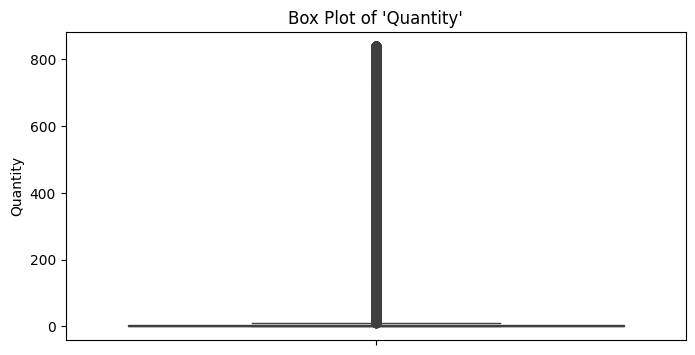

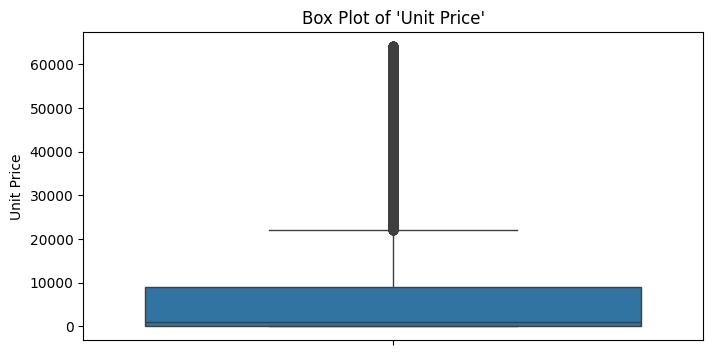

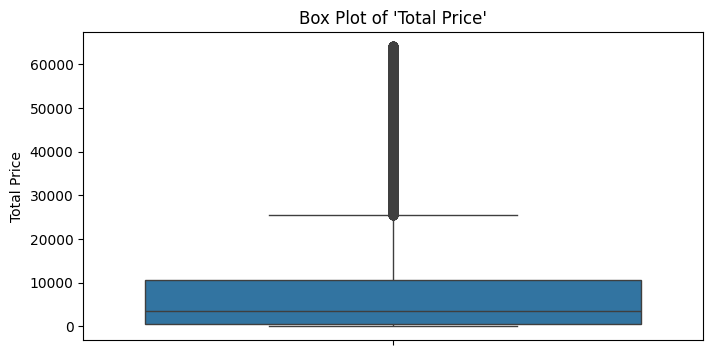

In [54]:
for col in numerical_cols:
    # Box plots for numerical features to identify outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of '{col}'")
    plt.show()

### 3. Handling Inconsistent Data


In [55]:
# Standardizing 'Supplier Name' to uppercase
df['Supplier Name'] = df['Supplier Name'].str.upper()